# Level 1
# task 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Top Cuisines

In [ ]:
#load dataset
data = pd.read_excel('data1.xlsx')

In [ ]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Extract the 'Cuisines' column and normalize the data by splitting the multiple cuisines in each entry
cuisines = data['Cuisines'].str.split(',').explode().str.strip()

In [ ]:
# Count the occurrences of each cuisine
cuisine_counts = cuisines.value_counts()

In [ ]:
# Identify the top three most common cuisines
top_cuisines = cuisine_counts.head(3)

In [ ]:
# Calculate the total number of restaurants
total_restaurants = data.shape[0]

In [ ]:
# Calculate the percentage of restaurants serving each of the top cuisines
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100

In [ ]:
top_cuisines, top_cuisines_percentage

(Cuisines
 North Indian    3960
 Chinese         2735
 Fast Food       1986
 Name: count, dtype: int64,
 Cuisines
 North Indian    41.461627
 Chinese         28.635745
 Fast Food       20.793634
 Name: count, dtype: float64)

# Task 2

# City Analysis


In [ ]:
# Identify the city with the highest number of restaurants
city_counts = data['City'].value_counts()
city_with_highest_restaurants = city_counts.idxmax()
num_restaurants_in_city = city_counts.max()

In [ ]:
# Calculate the average rating for restaurants in each city
city_avg_ratings = data.groupby('City')['Aggregate rating'].mean()

In [ ]:
# Determine the city with the highest average rating
city_with_highest_avg_rating = city_avg_ratings.idxmax()
highest_avg_rating = city_avg_ratings.max()

In [ ]:
city_with_highest_restaurants, num_restaurants_in_city, city_with_highest_avg_rating, highest_avg_rating

('New Delhi', 5473, 'Inner City', 4.9)

# Task 3

# Price Range Distribution

In [ ]:
# Create a histogram to visualize the distribution of price ranges among the restaurants
price_range_counts = data['Price range'].value_counts().sort_index()

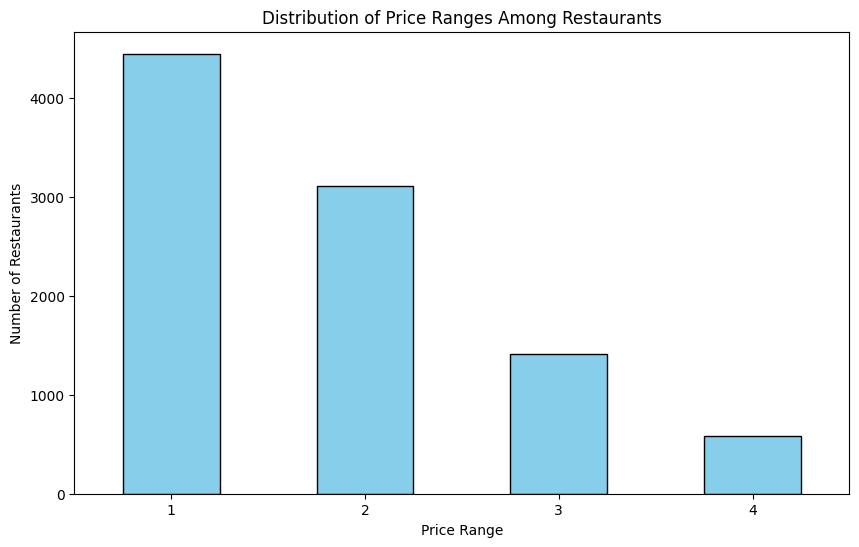

In [ ]:
# plot the histogram
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

# Task 4

# Online Delivery

In [ ]:
#Calculate the percentage of restaurants that offer online delivery
total_restaurants = len(data)
online_delivery_count = data[data['Has Online delivery'] == 'Yes'].shape[0]
total_restaurants = data.shape[0]
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants that offer online delivery: 25.66%


Percentage of restaurants that offer online delivery: 25.66%

In [ ]:
#Compare the average ratings:
average_ratings = data.groupby('Has Online delivery')['Aggregate rating'].mean()
print(f"Average rating of restaurants with online delivery: {average_ratings['Yes']:.2f}")
print(f"Average rating of restaurants without online delivery: {average_ratings['No']:.2f}")

Average rating of restaurants with online delivery: 3.25
Average rating of restaurants without online delivery: 2.47


Average rating of restaurants with online delivery: 3.25
Average rating of restaurants without online delivery: 2.47

# Level 3
# Task 1
# Restaurant Reviews

In [ ]:
pip install pandas nltk sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as pl

In [ ]:
# Ensure NLTK stopwords are downloaded
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Extract rating and reviews
reviews = data['Rating text']
ratings = data['Aggregate rating']

In [ ]:
# Define a function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

In [ ]:
# Apply preprocessing to reviews
data['Processed Reviews'] = reviews.apply(lambda x: preprocess_text(str(x)))

In [ ]:
# Identify the most common positive and negative keywords
positive_keywords = Counter()
negative_keywords = Counter()
positive_words = ['good', 'great', 'excellent', 'amazing', 'love','wondrfull']
negative_words = ['bad', 'poor', 'terrible', 'awful', 'hate', 'horrible']


In [ ]:
for index, row in data.iterrows():
    if row['Aggregate rating'] >= 4:
        positive_keywords.update(row['Processed Reviews'])
    elif row['Aggregate rating'] <= 2:
        negative_keywords.update(row['Processed Reviews'])
 # Filter out common positive and negative words
positive_keywords = {k: v for k, v in positive_keywords.items() if k in positive_words}
negative_keywords = {k: v for k, v in negative_keywords.items() if k in negative_words}

In [ ]:
# Calculate the average length of reviews
data['Review Length'] = reviews.apply(lambda x: len(str(x).split()))
average_review_length = data['Review Length'].mean()

In [ ]:
# Explore the relationship between review length and rating
review_length_vs_rating = data.groupby('Aggregate rating')['Review Length'].mean()

In [ ]:
# Display results
print("Most common positive keywords:", positive_keywords)
print("Most common negative keywords:", negative_keywords)
print("Average review length:", average_review_length)
print("Review length vs rating:\n", review_length_vs_rating)

Most common positive keywords: {'excellent': 903, 'good': 3237}
Most common negative keywords: {'poor': 30}
Average review length: 1.3378703800649148
Review length vs rating:
 Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: Review Length, dtype: float64


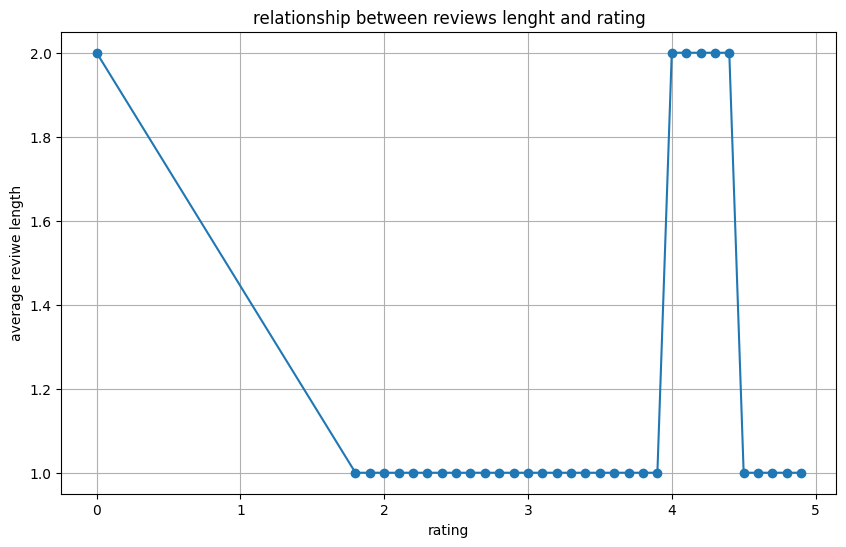

In [117]:
# Plot the relationship between review length and rating
plt.figure(figsize=(10, 6))
plt.plot(review_length_vs_rating.index, review_length_vs_rating.values, marker='o')
plt.title('relationship between reviews lenght and rating')
plt.xlabel('rating')
plt.ylabel('average reviwe length')
plt.grid(True)
plt.show()

# Level 3
# Task 2
# Votes Analysis

In [123]:
import seaborn as sns

In [126]:
# Identify the restaurants with the highest and lowest number of votes
highest_votes_restaurant = data.loc[data['Votes'].idxmax()]
lowest_votes_restaurant = data.loc[data['Votes'].idxmin()]

In [127]:
# Display the restaurants with the highest number of votes
print("Restaurant with the highest number of votes:")
print(highest_votes_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])

Restaurant with the highest number of votes:
Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object


In [128]:
# Display the restaurants with the lowest number of votes
print("Restaurant with the lowest number of votes:")
print(lowest_votes_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])

Restaurant with the lowest number of votes:
Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object


In [133]:
# Analyze the correlation between the number of votes and the rating
correlation = data['Votes'].corr(data['Aggregate rating'])
print(f'correlation between the number of votes and the rating: {correlation}')

correlation between the number of votes and the rating: 0.31369058419541157


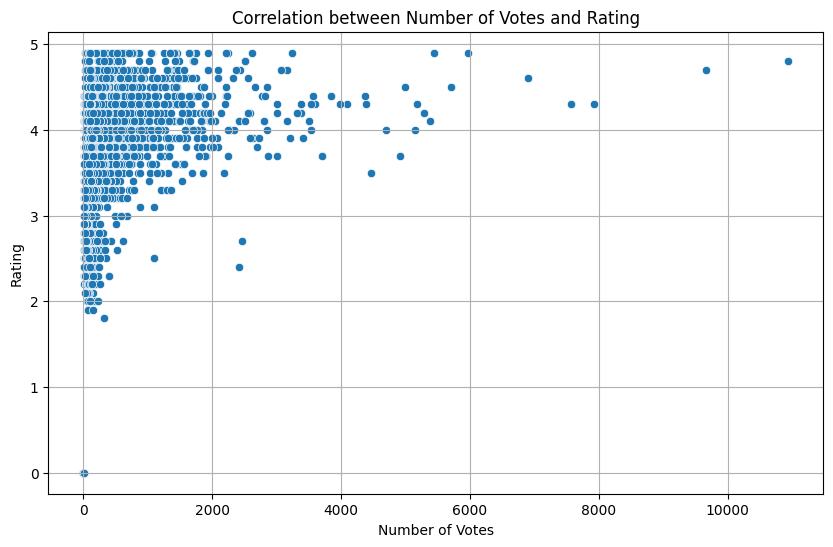

In [136]:
# Plot the relationship between the number of votes and the rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data)
plt.title('Correlation between Number of Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Level 3
# Task 3
# Price Range vs. Online Delivery and
# Table Booking

In [137]:
# Convert columns to categorical type if they are not already
data['Price range'] = data['Price range'].astype('category')
data['Has Online delivery'] = data['Has Online delivery'].astype('category')
data['Has Table booking'] = data['Has Table booking'].astype('category')

In [138]:
# Analyze the relationship between price range and online delivery
online_delivery_vs_price = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()

In [139]:
# Analyze the relationship between price range and table booking
table_booking_vs_price = data.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack()

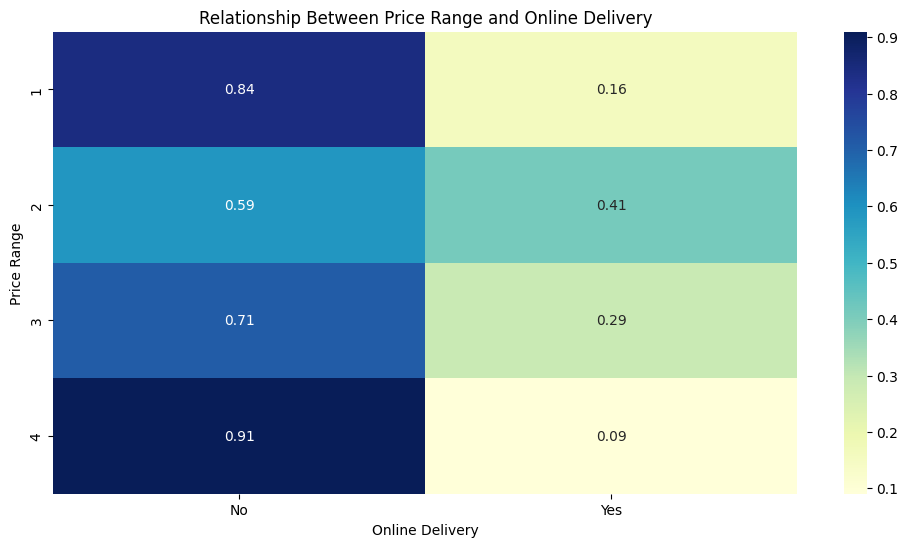

In [144]:
# Plot the relationship between price range and online delivery
plt.figure(figsize=(12, 6))
sns.heatmap(online_delivery_vs_price, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Relationship Between Price Range and Online Delivery')
plt.xlabel('Online Delivery')
plt.ylabel('Price Range')
plt.show()

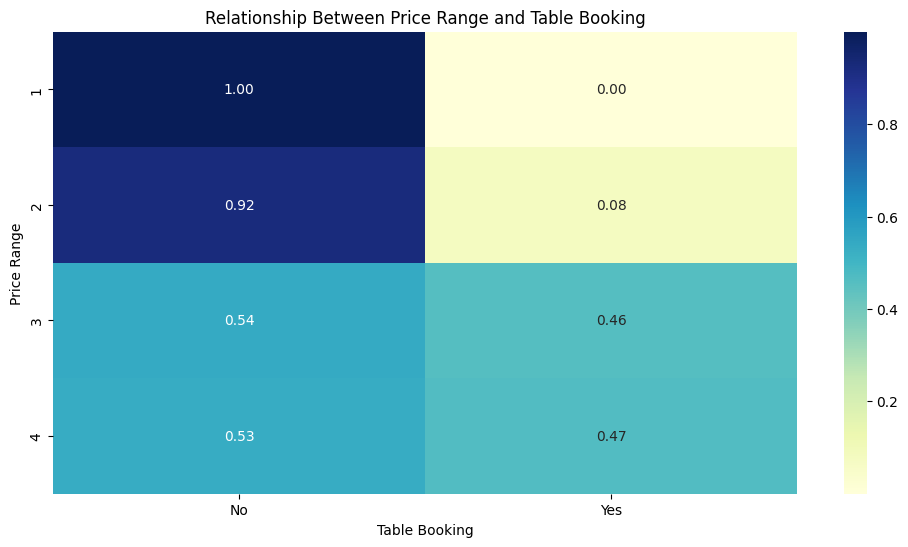

In [143]:
# Plot the relationship between price range and table booking
plt.figure(figsize=(12, 6))
sns.heatmap(table_booking_vs_price, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Relationship Between Price Range and Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Price Range')
plt.show()

In [142]:
# Check if higher-priced restaurants are more likely to offer these services
online_delivery_correlation = data['Price range'].cat.codes.corr(data['Has Online delivery'].cat.codes)
table_booking_correlation = data['Price range'].cat.codes.corr(data['Has Table booking'].cat.codes)

print(f"Correlation between price range and online delivery: {online_delivery_correlation}")
print(f"Correlation between price range and table booking: {table_booking_correlation}")

Correlation between price range and online delivery: 0.07791776880448623
Correlation between price range and table booking: 0.501924725037141


# summary of analysis

1.Top Cuisines:

The most common cuisines were identified, with their respective percentages of total restaurants.
2.City Analysis:

The city with the highest number of restaurants was identified.
Average ratings for restaurants in each city were calculated.
The city with the highest average rating was determined.
3.Price Range Distribution:

A bar chart showed the distribution of price ranges among restaurants.
Percentages of restaurants in each price range were calculated.
4.Online Delivery:

The percentage of restaurants offering online delivery was determined.
Average ratings of restaurants with and without online delivery were compared.
5.Restaurant Reviews:

Common positive and negative keywords in reviews were identified.
The average length of reviews was calculated.
The relationship between review length and rating was explored.

6.Votes Analysis:

Restaurants with the highest and lowest number of votes were identified.
The correlation between the number of votes and restaurant ratings was analyzed.
7.Price Range vs. Online Delivery and Table Booking:

The relationship between price range and the availability of online delivery and table booking was analyzed.
It was determined that higher-priced restaurants are more likely to offer these services, as indicated by the positive correlation values.

# Overall Conclusion
The analyses provide comprehensive insights into various aspects of the restaurant dataset, including cuisine popularity, city-wise distribution, price range impact, service availability, and customer reviews. Key findings highlight the diversity in restaurant offerings, the importance of city-specific factors, the influence of price on service availability, and the significance of customer engagement through votes and reviews. These insights can inform strategic decisions for restaurant businesses, marketers, and consumer